# Homework IV - ME 364 (Spring 2022) 
Julia Buckley

In [2]:
import pandas as pd
from math import pi
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from mpl_toolkits.mplot3d import Axes3D

### <font color='red'>__Question I__</font> 
A series of measurements have been done on a vibrating system, which we can be simplified as a single degree-of-freedom. The stiffness of the system was changed and the time period of the system was measured. The data is recorded in a dataset and attached to this assingment with the name `Q1.csv`. This dataset includes stiffness values and the corresponding time period for the oscillation. Use <u>simple linear regression</u> to estimate the system's mass.

<font color='blue'>__NOTES :__</font>
- For a system with single degree-of-freedom, $\omega_n=\sqrt{\frac{k}{m}}$
- The time period of a system and its natural frequency are related with $\omega_n=\frac{2\pi}{T}$



In [3]:
url = 'https://raw.githubusercontent.com/buckley2/ME364/main/Data%20Files/Q1.csv'
df = pd.read_csv(url)

df.head()

,Stiffness (N/m),Time Period (s)
0,10.000000,6.327388
1,35.789474,3.256412
2,61.578947,2.533519
3,87.368421,2.068982
4,113.157895,1.817985


In [4]:
def wnsquared(x):
    return (((1/x)*2*np.pi)**2)

df['Time Period (s)'] = df['Time Period (s)'].map(wnsquared)
df.rename(columns = {'Time Period (s)':'Natural Frequency Squared'}, inplace = True)
df.head(5)

,Stiffness (N/m),Natural Frequency Squared
0,10.000000,0.986077
1,35.789474,3.722896
2,61.578947,6.150515
3,87.368421,9.222452
4,113.157895,11.944808


w_0=0.186 and w_1=0.103


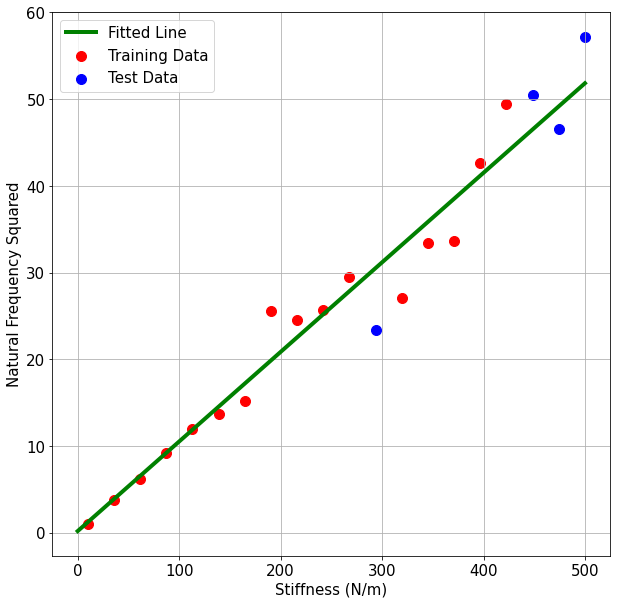

In [6]:
#Building the regression model

x_data=np.array(df[['Stiffness (N/m)']])
y_data=np.array(df[['Natural Frequency Squared']])

x_train,x_test,y_train,y_test=train_test_split(
    x_data,y_data, test_size=0.2, shuffle=True, random_state=100)

lrm = LinearRegression()
lrm.fit(x_train,y_train)

w0l=lrm.intercept_[0]  # w_0
w1l=lrm.coef_[0][0]    # W-1
print(f'w_0={w0l:.3f} and w_1={w1l:.3f}')

yhat = lrm.predict(x_test)
np.column_stack([y_test, yhat])
plt.figure(figsize=(10,10))                      
plt.rc('font',size=15)                           

# Plotting data
plt.scatter(x_train, y_train,s=100,color='red',label='Training Data')
plt.scatter(x_test, y_test,s=100,color='blue', label='Test Data')
xplot=np.linspace(0,500,num=100)
yplot=w0l+w1l*xplot
plt.plot(xplot, yplot, lw=4,color='green', label='Fitted Line')
plt.ylabel('Natural Frequency Squared')
plt.xlabel('Stiffness (N/m)')
plt.grid(True)
plt.legend(loc='best');

### <font color='red'>__Question II__</font>


We are trying to model a system with two degrees of freedom (https://www.brown.edu/Departments/Engineering/Courses/En4/Notes/vibrations_mdof/vibrations_mdof.htm) based on some measurement data. We have the magnitude of input force and the corresponding maximum displacements of mass 1 and mass 2 for given input forces. The data is stored in the csv file `Q2.csv`. 

- Use <u>Linear Regression</u> to develop a model to predict the magnitude of the input force if we know the displacements of mass 1 and mass 2.  

- Use evaluation metrics to assess the performance of your model. Is this a good model? Why? Run your model multiple times and look at the evaluation metrics. Do you see anything unusual about these metrics?

- What is the predicted force magnitude when mass 1 and mass 2 displacements both are 0.12 m ?

In [7]:
url2 = 'https://raw.githubusercontent.com/buckley2/ME364/main/Data%20Files/Q2.csv'
df2 = pd.read_csv(url2)

df2.head()

,Input Force (N),Max_Disp_x2 (m),Max_Disp_x1 (m)
0,0.050000,-0.088575,0.076227
1,0.053061,0.136006,0.086865
2,0.056122,0.102389,0.119084
3,0.059184,0.103362,0.007922
4,0.062245,0.069651,-0.021716


In [8]:
x_data2=np.array(df2[['Max_Disp_x2 (m)','Max_Disp_x1 (m)']])
y_data2=np.array(df2[['Input Force (N)']])


x_train2, x_test2, y_train2, y_test2=train_test_split(x_data2, y_data2, test_size=0.2, shuffle=True, random_state=10)
lrm2 = LinearRegression()
lrm2.fit(x_train2, y_train2)


w02=lrm2.intercept_[0]  # w_0
w12=lrm2.coef_[0,0]     # w_1
w22=lrm2.coef_[0,1]     # w_2


print(f'w_0={w02:0.2f}, w_1= {w12:.2f} and w2={w22:.2f}')


yhat2 = lrm2.predict(x_test2)
np.column_stack([y_test2, yhat2])

w_0=0.06, w_1= 0.16 and w2=0.40


array([[0.16326531, 0.11324192],
       [0.12040816, 0.11780917],
       [0.18469388, 0.1738816 ],
       [0.17857143, 0.15586319],
       [0.19387755, 0.21532035],
       [0.11122449, 0.09816955],
       [0.05918367, 0.07656571],
       [0.14183673, 0.16654763],
       [0.07142857, 0.1050578 ],
       [0.06836735, 0.12774258]])

In [9]:
MSE2 = mean_squared_error(y_test2, yhat2)
print(f'The value of mean squared error is: {MSE2:.2f}')


r2score2 = r2_score(y_test2, yhat2)
print(f'The value of R2 is: {r2score2:.2f}')


MAE2=mean_absolute_error(y_test2, yhat2)
print(f'The value of mean absolute error is: {MAE2:.2f}')

The value of mean squared error is: 0.00
The value of R2 is: 0.60
The value of mean absolute error is: 0.03


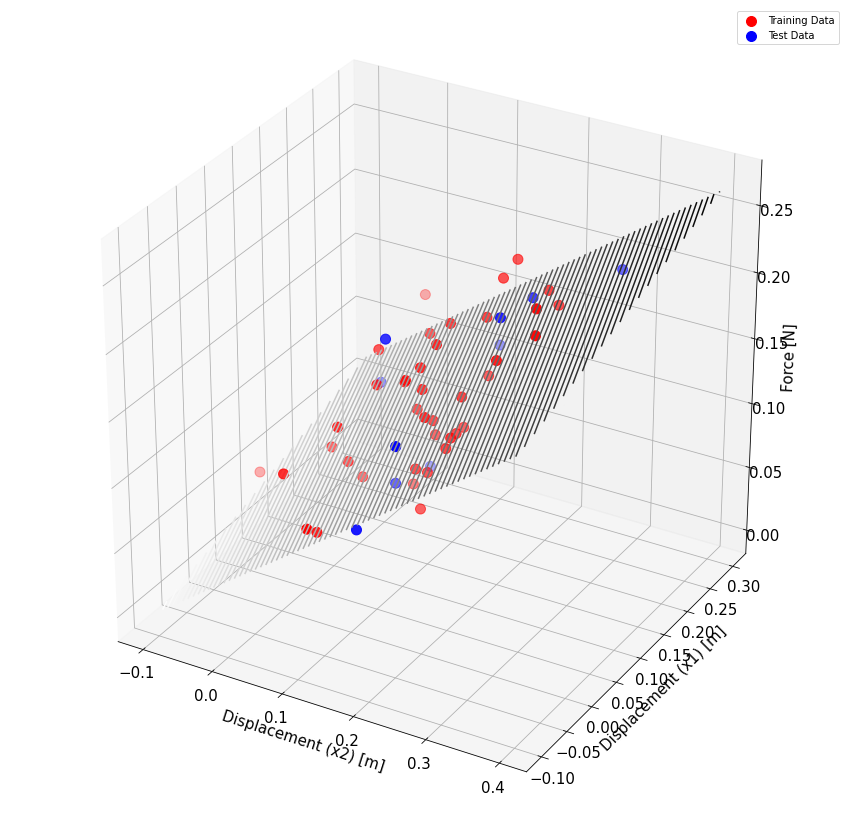

In [10]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
plt.rc('font',size=10)

xt =x_train2[:,0]
yt =x_train2[:,1]
zt =y_train2[:,0]

ax.scatter(xt, yt, zt, c='r', marker='o',s=100, label='Training Data')

xs =x_test2[:,0]
ys =x_test2[:,1]
zs =y_test2[:,0]

ax.scatter(xs, ys, zs, c='b', marker='o',s=100, label='Test Data')

xsrf = np.linspace(-.10, 0.3, 50)
ysrf = np.linspace(-.10,.4, 50)
X, Y = np.meshgrid(xsrf, ysrf)
Z = w02+w12*X+w22*Y
ax.contour3D(Y,X, Z, 100, cmap='binary')

ax.set_xlabel('Displacement (x2) [m]')
ax.set_ylabel('Displacement (x1) [m]')
ax.set_zlabel('Force [N]')

plt.legend()
plt.show()